<a href="https://colab.research.google.com/github/valdolab/DS_mAIstros/blob/main/notes/Week3_note_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
## Basic regression algorythms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#notes for the class to do the lenear regression algorithm 
#import data to make the training and test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Continuos valued data generator

In [ ]:
class contValData():
    def random_seed(rseed):
        np.random.seed(rseed)
        
    def create(self, D, N, r=20):
        self.X = np.linspace(0, r, N).reshape(N,D)
        self.y = np.sqrt(self.X)+np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(N,1)*0.2)
        return self.X, self.y
    
    def show(self):
        plt.figure()
        plt.scatter(self.X,self.y)
    

In [ ]:
dat = contValData()

In [ ]:
X,y = dat.create(1,200)

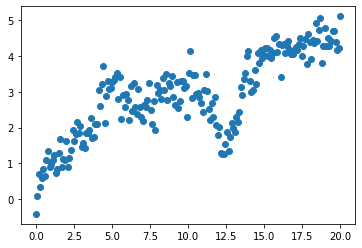

In [ ]:
dat.show()

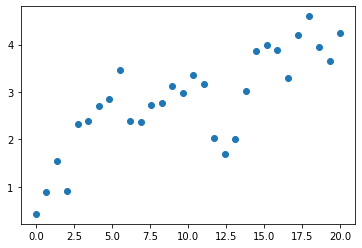

In [ ]:
MyDat = contValData()
x_test, y_test = MyDat.create(1,30)
MyDat.show()

### Simple linear regression

In [ ]:
class SimpleLinearReg():
    def fit(self, X, y):
        self.y = y
        self.d = np.mean(X**2)-np.mean(X)**2
        self.w0 = (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
        self.w1 = (np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d
        
    def predict(self, X, show=False):
        y_hat = self.w1*X + self.w0
        
        if(show):
            plt.figure()
            plt.scatter(X, self.y, s=8)
            plt.plot(X, y_hat, color = "#ff0070")
        return y_hat        

In [ ]:
slr = SimpleLinearReg()

In [ ]:
slr.fit(X, y)

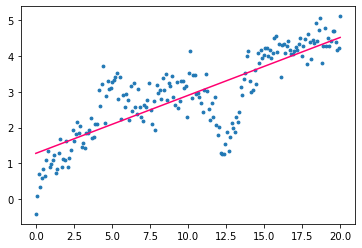

In [ ]:
y_hat = slr.predict(X, show=True)

In [ ]:
#engineer a column
y2 = y**2

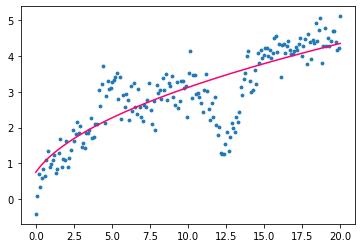

In [ ]:
slr.fit(X, y2)
y_hat2 = slr.predict(X)
plt.figure()
plt.scatter(X, y, s=8)
plt.plot(X, np.sqrt(y_hat2), color="#ff0070")

### kNN regression
Define a radius:
$radius(V_R) = \vert\vert x_{(k)} -x\vert\vert$

$\gamma_k \frac{1}{\vert\vert x_{(k)}-x\vert\vert + \epsilon}$

In [ ]:
class KNNRegressor():
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X - X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
            y_hat[i] = gamma_k.dot(self.y[idxt])
        
        return y_hat

In [ ]:
knnr = KNNRegressor()

In [ ]:
knnr.fit(X,y)

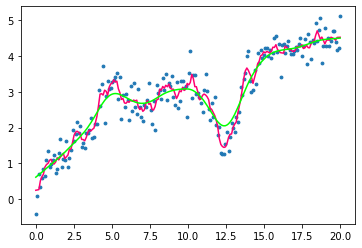

In [ ]:
y_hat = knnr.predict(X, 5)
y_hat2 = knnr.predict(X, 40)

#plot
plt.figure()
plt.scatter(X, y, s=8)
plt.plot(X, y_hat, color="#ff0070")
plt.plot(X, y_hat2, color="#00ff00")

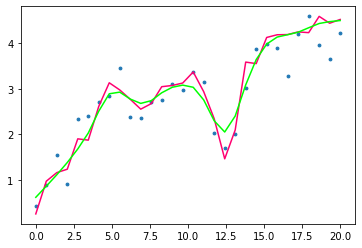

In [ ]:
y_hat = knnr.predict(x_test, 5)
y_hat2 = knnr.predict(x_test, 40)

plt.figure()
plt.scatter(x_test, y_test, s=8)
plt.plot(x_test, y_hat, color="#ff0070")
plt.plot(x_test, y_hat2, color="#00ff00")

## Optimization of linear regression
### Simple linear regression using np.linalg.solve

In [ ]:
class LinearRegression():
    def fit(self, X, y):
        self.w = np.linalg.solve(X.T@X, X.T@y)
    
    def predict(self, X):
        return np.matmul(X, self.w)

In [ ]:
def OLS(Y,Y_hat,N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [ ]:
def R2(Y,Y_hat):
    return (1-(np.sum((Y-Y_hat)**2)/np.sum((y-np.mean(y))**2)))

In [ ]:
class MVLinearRegression():
    
    def fit(self, X,y, eta = 1e-3, epochs =1e3, show_curve = False):
        epochs =int(epochs)
        N, D = X.shape
        Y =y

        #Initialize the weights
        self.W =np.random.randn(D)
    
        J = np.zeros(epochs)

        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)
            #weight update Rule:
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()

    def predict(self,X):
        return X @ self.W

In [ ]:
#import the toy dataset
myReg = MVLinearRegression()

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Classroom/DS mAIstros/datasets/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = data[['price','bedrooms','bathrooms','condition','sqft_above']].copy()
X

,price,bedrooms,bathrooms,condition,sqft_above
0,221900.0,3,1.00,3,1180
1,538000.0,3,2.25,3,2170
2,180000.0,2,1.00,3,770
3,604000.0,4,3.00,5,1050
4,510000.0,3,2.00,3,1680
...,...,...,...,...,...
21608,360000.0,3,2.50,3,1530
21609,400000.0,4,2.50,3,2310
21610,402101.0,2,0.75,3,1020
21611,400000.0,3,2.50,3,1600


In [ ]:
X = X.to_numpy()

In [ ]:
y = X[:,0]

In [ ]:
X=X[:,1:]
X

array([[3.00e+00, 1.00e+00, 3.00e+00, 1.18e+03],
       [3.00e+00, 2.25e+00, 3.00e+00, 2.17e+03],
       [2.00e+00, 1.00e+00, 3.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03],
       [3.00e+00, 2.50e+00, 3.00e+00, 1.60e+03],
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03]])

In [ ]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

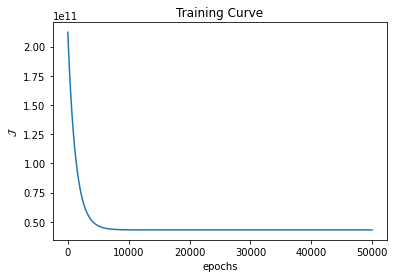

In [ ]:
myReg.fit(X,y, epochs=5e4, eta=1e-10, show_curve=True)

In [ ]:
Xtest = np.array([[3,2,3,2000]])

In [ ]:
myReg.predict(Xtest)

array([592303.61847983])

# Introduction to geospace analysis

In [ ]:
from geopy import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="mAIstros")

In [ ]:
location = geolocator.geocode("1785 The Exchange SE, Atlanta")

In [ ]:
location

Location(1785, The Exchange Southeast, Atlanta, Cobb County, Georgia, 30339, United States, (33.90915665, -84.47914869915438, 0.0))

In [ ]:
location.address

'1785, The Exchange Southeast, Atlanta, Cobb County, Georgia, 30339, United States'

In [ ]:
location = geolocator.geocode("10 Downing Street")

In [ ]:
location

Location(10 Downing Street, 10, Downing Street, Westminster, Covent Garden, London, Greater London, England, SW1A 2AA, United Kingdom, (51.5034927, -0.12770540128798905, 0.0))

In [ ]:
a,b,c = location.point

In [ ]:
a

51.5034927

In [ ]:
b

-0.12770540128798905

In [ ]:
c

0.0

## Regularization
There are 2 types of regularization. \\
Punish the weihts to produce a more generalized prediction \\
For OLS regression: \\

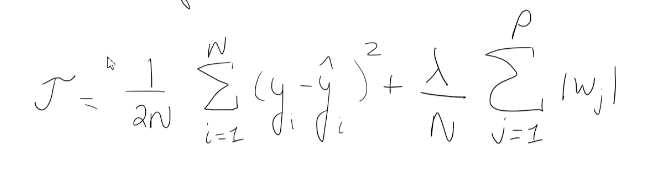

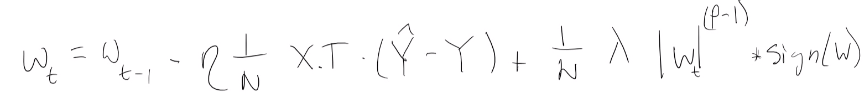

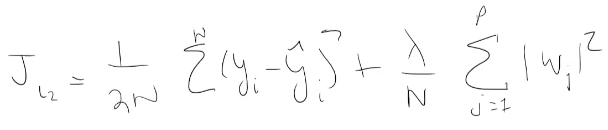

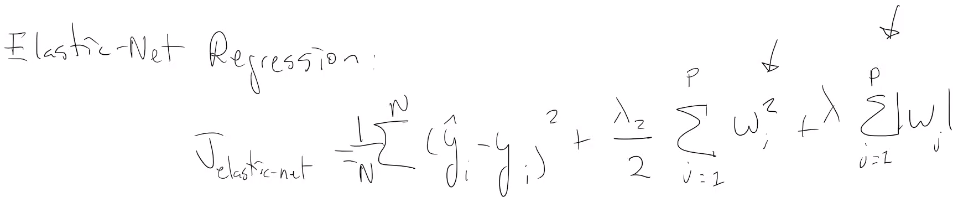

**Interview question:** \\
**What is the difference between L1 and L2 regularization?** \\
L1 or Lasso will reduce some features to 0, thus acting as dimensionality reduction. \\
L2 or Ridge regression purishes the square of the weihgts tus affecting larger features more, creating a scallws effect. \\

**How do you reduce overfitting?** \\
1. Get more data \\
2. Apply regularization \\
Regularization is: Regularization basically adds the penalty as model complexity increases. Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit. And there are two types of regularization (return to before question)

More info: https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c

LP Regularization:

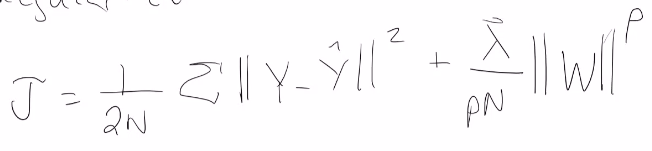

### Example of Linear regression with regularization

In [ ]:
class OURLinearRegression():
    
    def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False, lambd = 0, p = 1):
        epochs = int(epochs)
        N, D = X.shape
        Y = y
        
        self.W = np.random.randn(D)
        
        J = np.zeros(epochs)
        
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N) + (lambd/(p*N))*np.linalg.norm(self.W, ord=p, keepdims=True)
            #print((lambd/(p*N))*np.linalg.norm(self.W, ord=p, keepdims=True))
            self.W -= eta*(1/N)*(X.T@(Y_hat - Y) + (1/N)*(lambd*np.abs(self.W)**(p-1)*np.sign(self.W)))
                    
        #print("This is W:", self.W)
        #print("This is J:", J)
        #print("This is P_hat:", P_hat)    
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()        
    def predict(self, X):
        return X @ self.W

**Interview question:** \\
**How do you know if your model is overfitting?** \\
If training matrix are much, much better that test set matrix, model is overfitting